# Project1: Iris Dataset


# Import libraries

In [2]:

# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
sns.set(color_codes=True)
%matplotlib inline


# Load dataset


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [6]:
dataset.shape

(150, 5)

# Check The Head of Dataset

In [7]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Statistical Summary

we can take a look at a summary of each attribute. We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

In [8]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

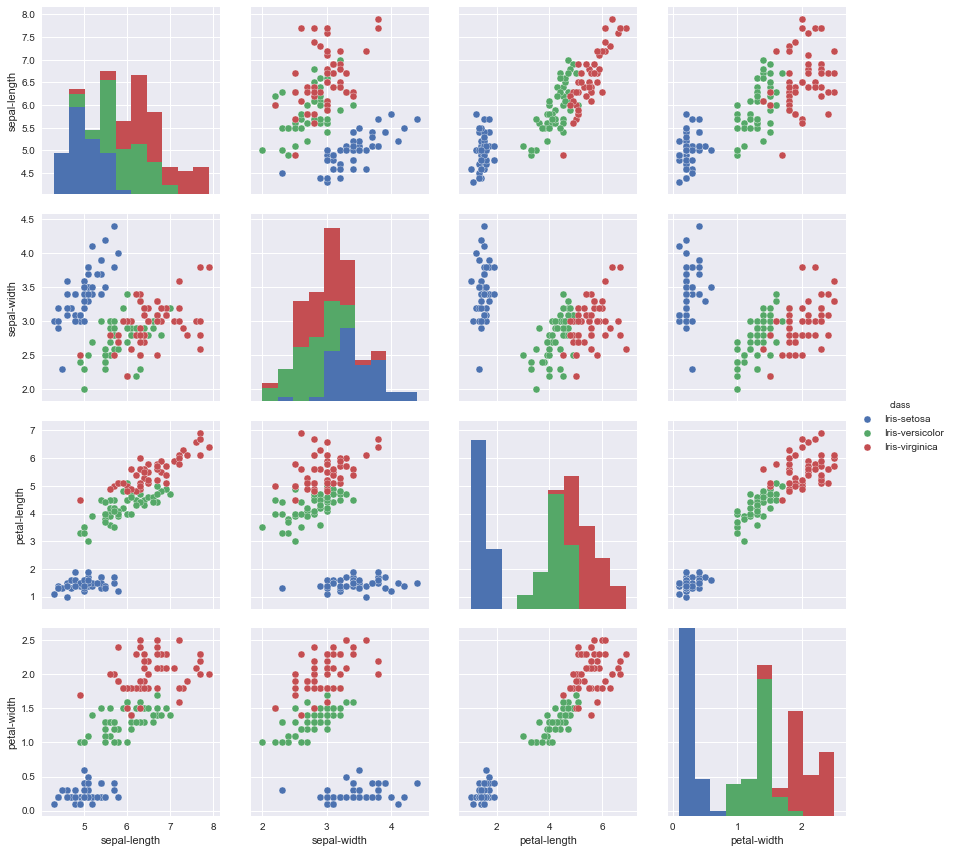

In [9]:
sns.pairplot(dataset, hue='class', size=3, aspect=1);

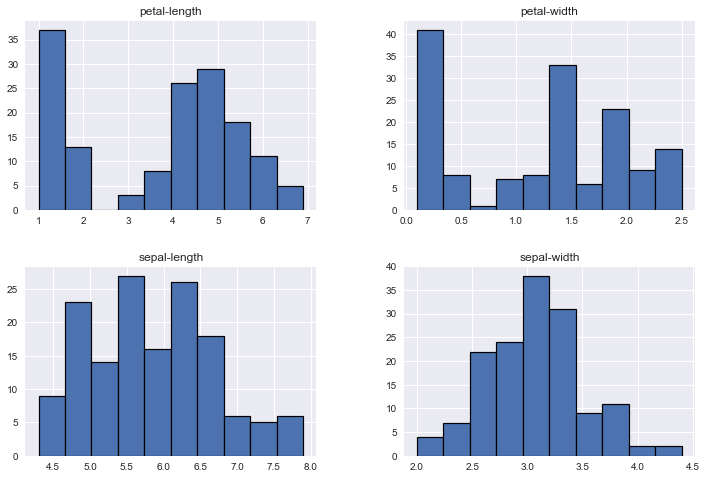

In [10]:
dataset.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

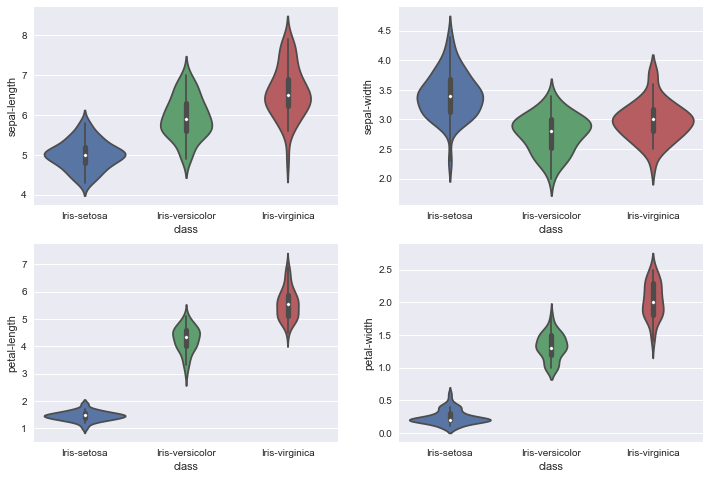

In [11]:
plt.figure(figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal-length', data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='class', y='sepal-width', data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='class', y='petal-length', data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal-width', data=dataset);

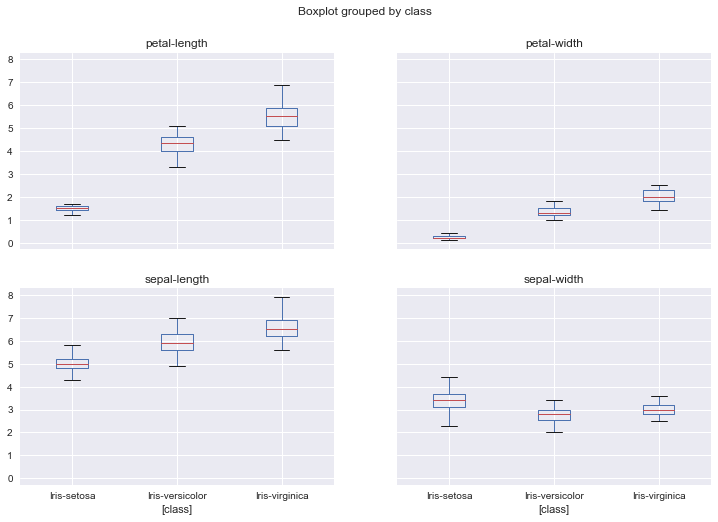

In [12]:
dataset.boxplot(by='class', figsize=(12,8));

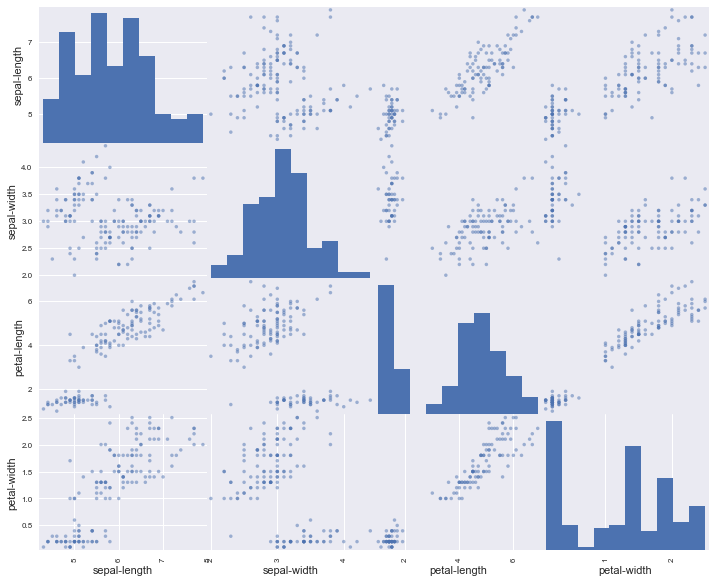

In [13]:
pd.plotting.scatter_matrix(dataset, figsize=(12,10))
plt.show()

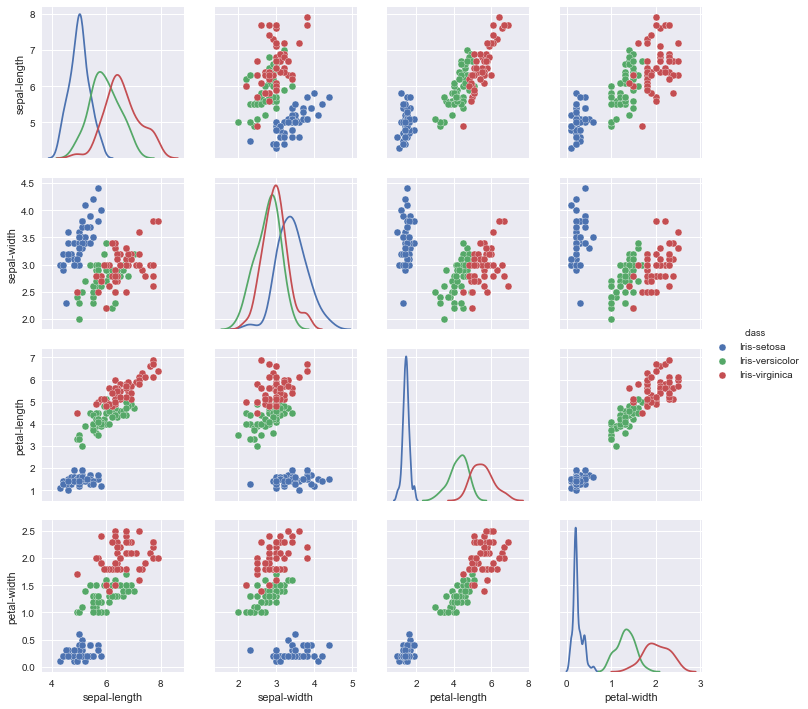

In [14]:
sns.pairplot(dataset, hue="class",diag_kind="kde");

In [15]:
array =  dataset.values
X = array[:,0:4]
y = array[:,-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.2, random_state=101)

# Build Models

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

# Applying k-Fold Cross Validation
* from sklearn.model_selection import cross_val_score
* accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
* accuracies.mean()
* accuracies.std()

Let’s evaluate different algorithms:

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.941667 (0.053359)
LDA: 0.975000 (0.038188)
KNN: 0.941667 (0.065085)
CART: 0.933333 (0.062361)
NB: 0.958333 (0.055902)
SVM: 0.958333 (0.055902)


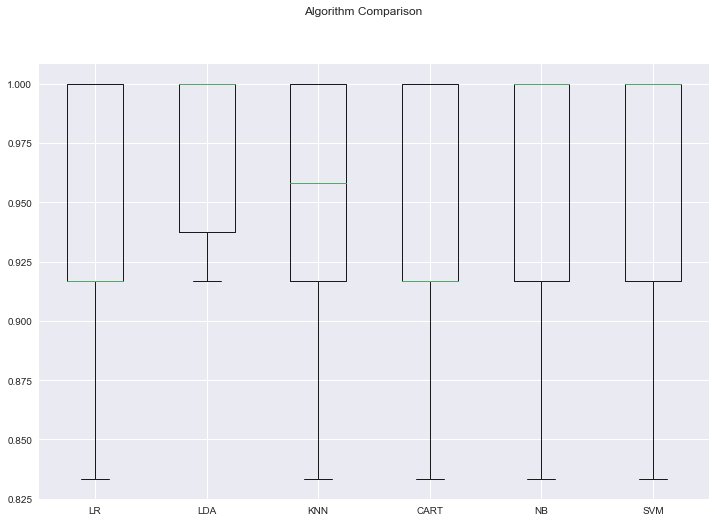

In [17]:

# Compare Algorithms
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* we can see LDA have better performance LDA: 0.975000 (0.038188)
* standard deviation also less

* Now we want to get an idea of the accuracy of the model on our validation set.This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

* We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [18]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 101)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  6]], dtype=int64)

In [23]:
# you can also check classification report
classification_report(y_test, y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       0.86      1.00      0.92        12\n Iris-virginica       1.00      0.75      0.86         8\n\n    avg / total       0.94      0.93      0.93        30\n'

In [24]:
# End of Iris Dataset Projects